In [54]:
# pip install fastf1

In [55]:
# pip install pathlib

In [56]:
import fastf1 as ff1
from fastf1 import plotting

from matplotlib import pyplot as plt
from matplotlib import figure

In [57]:
# setting plotting
plotting.setup_mpl()
# enabling the cache (allows for data to be retrieved once then saved and easier to get)
ff1.Cache.enable_cache('cache')

In [58]:
# loading the data
race = ff1.get_session(2021, 'Zandvoort', 'R')

In [59]:
 # race.load()

In [60]:
# collecting the race laps
laps = race.load(laps=True,telemetry=True)

core           INFO 	Loading data for Dutch Grand Prix - Race [v3.0.7]
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['33', '44', '77', '10', '16', '14', '55', '11', '31', '4', '3', '18', '5', '99', '88', '6', '63', '47', '22', '9']


In [61]:
laps = race.laps

In [62]:
laps

,Time,Driver,DriverNumber,LapTime,LapNumber,Stint,PitOutTime,PitInTime,Sector1Time,Sector2Time,...,FreshTyre,Team,LapStartTime,LapStartDate,TrackStatus,Position,Deleted,DeletedReason,FastF1Generated,IsAccurate
0,0 days 01:03:26.322000,VER,33,0 days 00:01:17.665000,1.0,1.0,0 days 00:22:45.505000,NaT,NaT,0 days 00:00:25.796000,...,False,Red Bull Racing,0 days 01:02:08.438000,2021-09-05 13:03:08.447,1,1.0,False,,False,False
1,0 days 01:04:41.300000,VER,33,0 days 00:01:14.978000,2.0,1.0,NaT,NaT,0 days 00:00:26.015000,0 days 00:00:26.037000,...,False,Red Bull Racing,0 days 01:03:26.322000,2021-09-05 13:04:26.331,1,1.0,False,,False,True
2,0 days 01:05:56.113000,VER,33,0 days 00:01:14.813000,3.0,1.0,NaT,NaT,0 days 00:00:26.031000,0 days 00:00:26.015000,...,False,Red Bull Racing,0 days 01:04:41.300000,2021-09-05 13:05:41.309,1,1.0,False,,False,True
3,0 days 01:07:11.030000,VER,33,0 days 00:01:14.917000,4.0,1.0,NaT,NaT,0 days 00:00:25.926000,0 days 00:00:26.033000,...,False,Red Bull Racing,0 days 01:05:56.113000,2021-09-05 13:06:56.122,1,1.0,False,,False,True
4,0 days 01:08:25.912000,VER,33,0 days 00:01:14.882000,5.0,1.0,NaT,NaT,0 days 00:00:25.846000,0 days 00:00:26.055000,...,False,Red Bull Racing,0 days 01:07:11.030000,2021-09-05 13:08:11.039,1,1.0,False,,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1356,0 days 01:51:04.723000,MAZ,9,0 days 00:01:18.748000,37.0,2.0,NaT,NaT,0 days 00:00:26.556000,0 days 00:00:28.574000,...,True,Haas F1 Team,0 days 01:49:45.975000,2021-09-05 13:50:45.984,1,19.0,False,,False,True
1357,0 days 01:52:21.037000,MAZ,9,0 days 00:01:16.314000,38.0,2.0,NaT,NaT,0 days 00:00:26.368000,0 days 00:00:26.631000,...,True,Haas F1 Team,0 days 01:51:04.723000,2021-09-05 13:52:04.732,1,19.0,False,,False,True
1358,0 days 01:53:37.595000,MAZ,9,0 days 00:01:16.558000,39.0,2.0,NaT,NaT,0 days 00:00:26.300000,0 days 00:00:26.576000,...,True,Haas F1 Team,0 days 01:52:21.037000,2021-09-05 13:53:21.046,1,19.0,False,,False,True
1359,0 days 01:54:55.230000,MAZ,9,0 days 00:01:17.635000,40.0,2.0,NaT,NaT,0 days 00:00:26.978000,0 days 00:00:27.027000,...,True,Haas F1 Team,0 days 01:53:37.595000,2021-09-05 13:54:37.604,1,19.0,False,,False,True


In [63]:
# Get laps of the drivers (BOT and HAM)
laps_bot = laps.pick_driver('BOT')
laps_ham = laps.pick_driver('HAM')
# Extract the fastest laps
fastest_bot = laps_bot.pick_fastest()
fastest_ham = laps_ham.pick_fastest()

In [64]:
# Get telemetry from fastest laps
telemetry_bot = fastest_bot.get_car_data().add_distance()
telemetry_ham = fastest_ham.get_car_data().add_distance()

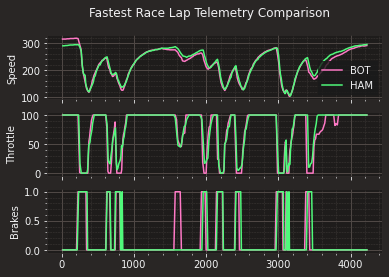

In [65]:
fig, ax = plt.subplots(3)
fig.suptitle("Fastest Race Lap Telemetry Comparison")
ax[0].plot(telemetry_bot['Distance'], telemetry_bot['Speed'], label='BOT')
ax[0].plot(telemetry_ham['Distance'], telemetry_ham['Speed'], label='HAM')
ax[0].set(ylabel='Speed')
ax[0].legend(loc="lower right")
ax[1].plot(telemetry_bot['Distance'], telemetry_bot['Throttle'], label='BOT')
ax[1].plot(telemetry_ham['Distance'], telemetry_ham['Throttle'], label='HAM')
ax[1].set(ylabel='Throttle')
ax[2].plot(telemetry_bot['Distance'], telemetry_bot['Brake'], label='BOT')
ax[2].plot(telemetry_ham['Distance'], telemetry_ham['Brake'], label='HAM')
ax[2].set(ylabel='Brakes')
# Hide x labels and tick labels for top plots and y ticks for right plots.
for a in ax.flat:
    a.label_outer()